In [2]:
# @title Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
url1 = "/content/drive/MyDrive/IBM Data Analyst/Project: HR analysis/hr_employees.csv"
url2 = "/content/drive/MyDrive/IBM Data Analyst/Project: HR analysis/hr_salary.csv"
url3 = "/content/drive/MyDrive/IBM Data Analyst/Project: HR analysis/hr_attendance.csv"
url4 = "/content/drive/MyDrive/IBM Data Analyst/Project: HR analysis/hr_performance.csv"

employees = pd.read_csv(url1)
salary = pd.read_csv(url2)
attendance = pd.read_csv(url3)
performance = pd.read_csv(url4)
print(employees.head())
print(salary.head())
print(attendance.head())
print(performance.head())

   EmployeeID           Name Department Gender  Age    JoinDate Attrition
0        1001     John Smith         HR      M   28  2016-01-01        No
1        1002       Jane Doe    Finance      F   34  2016-06-29        No
2        1003  Alice Johnson         IT      F   25  2016-12-26       Yes
3        1004        Bob Lee         IT      M   30  2017-06-24        No
4        1005     Clara Wang  Marketing      F   27  2017-12-21       Yes
   EmployeeID    Month  BaseSalary  Bonus
0        1001  2023-01       50000   2000
1        1002  2023-02       51000   2500
2        1003  2023-03       52000   3000
3        1004  2023-01       53000   3500
4        1005  2023-02       54000   4000
   EmployeeID        Date CheckIn CheckOut   Status
0        1001  2023-03-01   09:00    18:00  Present
1        1002  2023-03-02   09:00    18:00  Present
2        1003  2023-03-03   09:00    18:00  Present
3        1004  2023-03-04   09:00    18:00  Present
4        1005  2023-03-05   09:00    18:00  

In [6]:
print(employees.info())
print(salary.info())
print(attendance.info())
print(performance.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   EmployeeID  20 non-null     int64 
 1   Name        20 non-null     object
 2   Department  20 non-null     object
 3   Gender      20 non-null     object
 4   Age         20 non-null     int64 
 5   JoinDate    20 non-null     object
 6   Attrition   20 non-null     object
dtypes: int64(2), object(5)
memory usage: 1.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   EmployeeID  60 non-null     int64 
 1   Month       60 non-null     object
 2   BaseSalary  60 non-null     int64 
 3   Bonus       60 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (t

In [15]:
employees['Age'].max()

45

In [ ]:
# @title Phân tích tỷ lệ nghỉ việc

In [17]:
def age_group(age):
  if age < 20:
    return "U20"
  elif age < 30:
    return "U30"
  elif age < 40:
    return "U40"
  else:
    return "U50"

employees['age_group'] = employees['Age'].apply(age_group)
employees.head()

,EmployeeID,Name,Department,Gender,Age,JoinDate,Attrition,age_group
0,1001,John Smith,HR,M,28,2016-01-01,No,U30
1,1002,Jane Doe,Finance,F,34,2016-06-29,No,U40
2,1003,Alice Johnson,IT,F,25,2016-12-26,Yes,U30
3,1004,Bob Lee,IT,M,30,2017-06-24,No,U40
4,1005,Clara Wang,Marketing,F,27,2017-12-21,Yes,U30


In [26]:
# @title tỷ lệ nghỉ việc theo phòng ban
off_department = employees.groupby("Department")["Attrition"].value_counts().unstack()
off_department["Yes"] = off_department["Yes"].fillna(0)
off_department["turnover_rate"]= (off_department["No"] / (off_department["Yes"] + off_department["No"]))*100
off_department.head()


Attrition,No,Yes,turnover_rate
Department,,,
Finance,5.0,0.0,100.0
HR,5.0,0.0,100.0
IT,3.0,3.0,50.0
Marketing,1.0,3.0,25.0


In [ ]:
# @title Nhận xét: Trong công ty, phòng tài chính & HR có xu hướng nghỉ việc nhiều nhất. Trong đó Marketing, nhân viên có xu hướng ổn định.

In [31]:
# @title tỷ lệ nghỉ việc theo giới tính
off_gender = employees.groupby("Gender")["Attrition"].value_counts().unstack()
off_gender["turnover_rate"]= round((off_gender["No"] / (off_gender["Yes"] + off_gender["No"]))*100,2)
off_gender.head()

Attrition,No,Yes,turnover_rate
Gender,,,
F,6,5,54.55
M,8,1,88.89


In [ ]:
# @title Nhận xét: Trong công ty, nữ giới có xu hướng nhảy việc nhiều hơn nam giới

In [32]:
# @title tỷ lệ nghỉ việc theo nhóm tuổi
off_age = employees.groupby("age_group")["Attrition"].value_counts().unstack()
off_age["Yes"] = off_age["Yes"].fillna(0)
off_age["No"] = off_age["No"].fillna(0)
off_age["turnover_rate"]= round((off_age["No"] / (off_age["Yes"] + off_age["No"]))*100,2)
off_age.head()

Attrition,No,Yes,turnover_rate
age_group,,,
U30,3.0,6.0,33.33
U40,8.0,0.0,100.00
U50,3.0,0.0,100.00


In [ ]:
# @title Nhận xét: Trong công ty, nhóm U30 có xu hướng nhảy việc, còn nhóm U40 trở lên có xu hướng ổn định.

In [68]:
# @title tỷ lệ nghỉ việc theo Rating
rating = performance.merge(employees, on="EmployeeID")
rating = rating.groupby("Rating")["Attrition"].value_counts().unstack()
rating["Yes"] = rating["Yes"].fillna(0)
rating["No"] = rating["No"].fillna(0)
rating["turnover_rate"]= round((rating["No"] / (rating["Yes"] + rating["No"]))*100,2)
rating.head()

Attrition,No,Yes,turnover_rate
Rating,,,
2,0.0,5.0,0.00
3,5.0,1.0,83.33
4,5.0,0.0,100.00
5,4.0,0.0,100.00


In [ ]:
# @title Nhận xét: Trong công ty, nhân viên có hiệu suất cao có xu hướng nhảy việc -> có thể cơ chế đãi ngộ chưa đủ sức hấp dẫn giữ chân nhóm có hiệu suất cao.

In [34]:
df_salary = salary.merge(employees, on="EmployeeID").merge(performance, on="EmployeeID")
df_salary["icome"] = df_salary["BaseSalary"] + df_salary["Bonus"]
df_salary.head()

,EmployeeID,Month,BaseSalary,Bonus,Name,Department,Gender,Age,JoinDate,Attrition,age_group,ReviewDate,Rating,Reviewer,icome
0,1001,2023-01,50000,2000,John Smith,HR,M,28,2016-01-01,No,U30,2023-03-31,3,Manager A,52000
1,1002,2023-02,51000,2500,Jane Doe,Finance,F,34,2016-06-29,No,U40,2023-03-31,4,Manager B,53500
2,1003,2023-03,52000,3000,Alice Johnson,IT,F,25,2016-12-26,Yes,U30,2023-03-31,2,Manager A,55000
3,1004,2023-01,53000,3500,Bob Lee,IT,M,30,2017-06-24,No,U40,2023-03-31,5,Manager C,56500
4,1005,2023-02,54000,4000,Clara Wang,Marketing,F,27,2017-12-21,Yes,U30,2023-03-31,3,Manager B,58000


In [35]:
# @title thu nhập bình quân theo phòng ban, giới tính, nhóm tuổi, rating, Attrition
income_department = df_salary.groupby("Department")["icome"].mean()
income_gender = df_salary.groupby("Gender")["icome"].mean()
income_age = df_salary.groupby("age_group")["icome"].mean()
income_rating = df_salary.groupby("Rating")["icome"].mean()
income_attrition = df_salary.groupby("Attrition")["icome"].mean()
print(income_department)
print(income_gender)
print(income_age)
print(income_rating)
print(income_attrition)

Department
Finance      62500.000000
HR           62000.000000
IT           62416.666667
Marketing    63250.000000
Name: icome, dtype: float64
Gender
F    62727.272727
M    62222.222222
Name: icome, dtype: float64
age_group
U30    61833.333333
U40    62062.500000
U50    65666.666667
Name: icome, dtype: float64
Rating
2    64000.000000
3    61333.333333
4    61500.000000
5    63625.000000
Name: icome, dtype: float64
Attrition
No     62285.714286
Yes    63000.000000
Name: icome, dtype: float64


In [ ]:
# @title Nhận xét: Phòng Marketing là phòng có thu nhập bình quân cáo nhất (giải thích được cho lý do tỷ lệ nghỉ việc phòng thấp nhất). Thu nhập bình quân có sự tăng theo nhóm tuổi -> Có thể công ty trả lương dựa theo thâm niên và dộ dày dặn kinh nghiệm (U50 có thu nhập bình quân cao nhất). Thu nhập bình quân nhóm có hiệu suất thấp cao nhất -> Chính sách trả lương công ty có thể chưa dựa theo hiệu suất (có thể giải thích cho lý do nhóm hiệu suất cao tỷ lệ nghỉ việc cao). Nhóm nghỉ việc có mức lương trung bình thấp hơn nhóm ở lại. Công ty không có sự phân biệt thu nhập theo giới tính.

In [39]:
# @title Lương cơ bản trung bình theo phòng ban, giới tính, nhóm tuổi, rating, Attrition
base_department = df_salary.groupby("Department")["BaseSalary"].mean()
base_gender = df_salary.groupby("Gender")["BaseSalary"].mean()
base_age = df_salary.groupby("age_group")["BaseSalary"].mean()
base_rating = df_salary.groupby("Rating")["BaseSalary"].mean()
base_attrition = df_salary.groupby("Attrition")["BaseSalary"].mean()
print(base_department)
print(base_gender)
print(base_age)
print(base_rating)
print(base_attrition)

Department
Finance      60000.000000
HR           59000.000000
IT           59166.666667
Marketing    60000.000000
Name: BaseSalary, dtype: float64
Gender
F    59727.272727
M    59222.222222
Name: BaseSalary, dtype: float64
age_group
U30    58777.777778
U40    59000.000000
U50    63000.000000
Name: BaseSalary, dtype: float64
Rating
2    61000.000000
3    58166.666667
4    59000.000000
5    60250.000000
Name: BaseSalary, dtype: float64
Attrition
No     59357.142857
Yes    59833.333333
Name: BaseSalary, dtype: float64


In [40]:
# @title Thưởng trung bình theo phòng ban, giới tính, nhóm tuổi, rating, Attrition
bonus_department = df_salary.groupby("Department")["Bonus"].mean()
bonus_gender = df_salary.groupby("Gender")["Bonus"].mean()
bonus_age = df_salary.groupby("age_group")["Bonus"].mean()
bonus_rating = df_salary.groupby("Rating")["Bonus"].mean()
bonus_attrition = df_salary.groupby("Attrition")["Bonus"].mean()
print(bonus_department)
print(bonus_gender)
print(bonus_age)
print(bonus_rating)
print(bonus_attrition)

Department
Finance      2500.0
HR           3000.0
IT           3250.0
Marketing    3250.0
Name: Bonus, dtype: float64
Gender
F    3000.0
M    3000.0
Name: Bonus, dtype: float64
age_group
U30    3055.555556
U40    3062.500000
U50    2666.666667
Name: Bonus, dtype: float64
Rating
2    3000.000000
3    3166.666667
4    2500.000000
5    3375.000000
Name: Bonus, dtype: float64
Attrition
No     2928.571429
Yes    3166.666667
Name: Bonus, dtype: float64


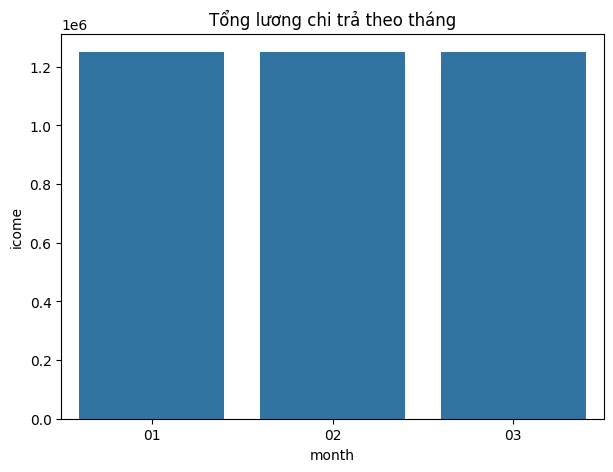

In [47]:
# @title Tổng lương chi trả theo tháng, phòng ban
df_salary[["year","month"]] = df_salary["Month"].str.split("-", expand=True)

total_month = df_salary.groupby("month")["icome"].sum().reset_index()
plt.figure(figsize=(7,5))
sns.barplot(x="month", y="icome", data=total_month)
plt.title("Tổng lương chi trả theo tháng")
plt.show()

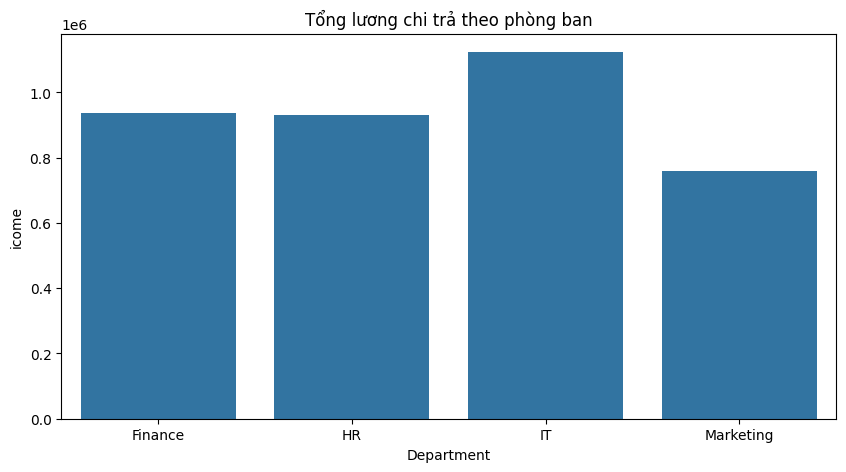

In [49]:
total_department = df_salary.groupby("Department")["icome"].sum().reset_index()
plt.figure(figsize=(10,5))
sns.barplot(x="Department", y="icome", data=total_department)
plt.title("Tổng lương chi trả theo phòng ban")
plt.show()


In [ ]:
# @title Nhận xét: Phòng IT chiếm ngân sách cao nhất.

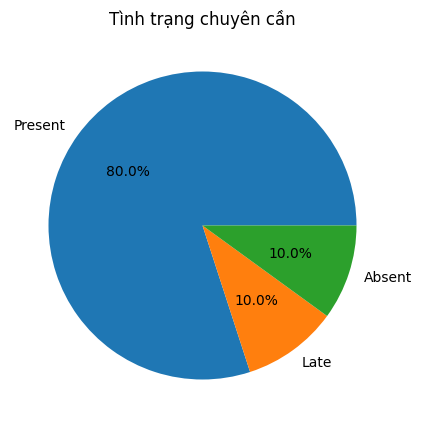

In [54]:
# @title Tình trạng chuyên cần
plt.figure(figsize=(5,5))
plt.pie(attendance["Status"].value_counts(), labels=attendance["Status"].value_counts().index, autopct="%1.1f%%")
plt.title("Tình trạng chuyên cần")
plt.show()

In [60]:
# @title Tình trạng chuyên cần theo phòng ban, giới tính, nhóm tuổi, rating, Attrition
atten = attendance.merge(employees, on="EmployeeID").merge(performance, on="EmployeeID")
atten.head()

,EmployeeID,Date,CheckIn,CheckOut,Status,Name,Department,Gender,Age,JoinDate,Attrition,age_group,ReviewDate,Rating,Reviewer
0,1001,2023-03-01,09:00,18:00,Present,John Smith,HR,M,28,2016-01-01,No,U30,2023-03-31,3,Manager A
1,1002,2023-03-02,09:00,18:00,Present,Jane Doe,Finance,F,34,2016-06-29,No,U40,2023-03-31,4,Manager B
2,1003,2023-03-03,09:00,18:00,Present,Alice Johnson,IT,F,25,2016-12-26,Yes,U30,2023-03-31,2,Manager A
3,1004,2023-03-04,09:00,18:00,Present,Bob Lee,IT,M,30,2017-06-24,No,U40,2023-03-31,5,Manager C
4,1005,2023-03-05,09:00,18:00,Present,Clara Wang,Marketing,F,27,2017-12-21,Yes,U30,2023-03-31,3,Manager B


In [62]:
atten_department = atten.groupby("Department")["Status"].value_counts(normalize=True).unstack()
print(atten_department)

Status      Absent  Late  Present
Department                       
Finance       0.12  0.08      0.8
HR            0.08  0.12      0.8
IT            0.10  0.10      0.8
Marketing     0.10  0.10      0.8


In [63]:
atten_gender = atten.groupby("Gender")["Status"].value_counts(normalize=True).unstack()
print(atten_gender)

Status    Absent      Late  Present
Gender                             
F       0.109091  0.090909      0.8
M       0.088889  0.111111      0.8


In [64]:
atten_age = atten.groupby("age_group")["Status"].value_counts(normalize=True).unstack()
print(atten_age)

Status       Absent      Late  Present
age_group                             
U30        0.088889  0.111111      0.8
U40        0.100000  0.100000      0.8
U50        0.133333  0.066667      0.8


In [65]:
atten_attrition = atten.groupby("Attrition")["Status"].value_counts(normalize=True).unstack()
print(atten_attrition)

Status     Absent  Late  Present
Attrition                       
No            0.1   0.1      0.8
Yes           0.1   0.1      0.8


In [66]:
atten_rating = atten.groupby("Rating")["Status"].value_counts(normalize=True).unstack()
print(atten_rating)

Status    Absent      Late  Present
Rating                             
2       0.120000  0.080000      0.8
3       0.066667  0.133333      0.8
4       0.120000  0.080000      0.8
5       0.100000  0.100000      0.8


In [ ]:
# @title Nhận xét: Tính chuyên cần giảm theo nhóm tuổi, các bạn trẻ tuy có xu hướng đi muộn nhưng chuyên cần tốt hơn nhóm tuổi cao. Nam hay đi muộn nhưng chuyên cần hơn nữ dù nữ ít đi muộn hơn nam. Phòng HR có tính chuyên cần tốt nhất (có thể do đặc thù phòng ban). Phòng Tài chính chuyên cần thấp nhất. Không có sự phân hoá rõ rệt tính chuyên cần dựa theo sự phân hoá hiệu suất

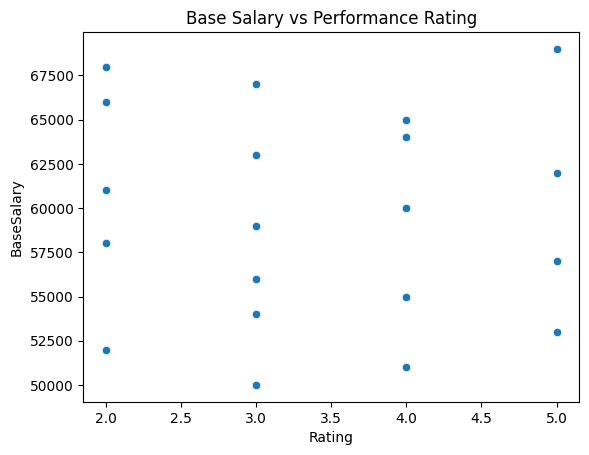

In [71]:
# @title Mối quan hệ giữa hiệu suất và mức lương
sns.scatterplot(data=df_salary, x="Rating", y="BaseSalary")
plt.title("Base Salary vs Performance Rating")
plt.show()

In [72]:
# @title Mô hình dự báo Rating và mức lương
from sklearn.linear_model import LinearRegression

X = df_salary[["Rating"]]  # biến độc lập
y = df_salary["BaseSalary"]  # biến phụ thuộc
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [73]:
# @title Dự đoán và đánh giá mô hình
df_salary["PredictedSalary"] = model.predict(X)

# So sánh thực tế và dự đoán
print(df_salary[["EmployeeID", "Rating", "BaseSalary", "PredictedSalary"]])

# Đánh giá độ chính xác
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y, df_salary["PredictedSalary"])
r2 = r2_score(y, df_salary["PredictedSalary"])
print(f"MSE: {mse:.2f}")
print(f"R-squared: {r2:.2%}")

    EmployeeID  Rating  BaseSalary  PredictedSalary
0         1001       3       50000     59570.175439
1         1002       4       51000     59394.736842
2         1003       2       52000     59745.614035
3         1004       5       53000     59219.298246
4         1005       3       54000     59570.175439
5         1006       4       55000     59394.736842
6         1007       3       56000     59570.175439
7         1008       5       57000     59219.298246
8         1009       2       58000     59745.614035
9         1010       3       59000     59570.175439
10        1011       4       60000     59394.736842
11        1012       2       61000     59745.614035
12        1013       5       62000     59219.298246
13        1014       3       63000     59570.175439
14        1015       4       64000     59394.736842
15        1016       4       65000     59394.736842
16        1017       2       66000     59745.614035
17        1018       3       67000     59570.175439
18        10

In [ ]:
# @title Nhận xét: MSE lớn → mô hình dự đoán kém chính xác. R-squared: 0.11% rất thấp -> Rating gần như không ảnh hưởng gì đến BaseSalary trong mô hình này.

In [ ]:
# @title Nguyên nhân có thể do lượng data quá ít nên mô hình không phát huy được.

In [74]:
# @title Dự đoán lương cho rating mới theo mô hình trên
new_rating = pd.DataFrame({"Rating": [2, 3, 4, 5]})
predicted = model.predict(new_rating)
print(pd.DataFrame({"Rating": new_rating["Rating"], "Predicted Salary": predicted}))

   Rating  Predicted Salary
0       2      59745.614035
1       3      59570.175439
2       4      59394.736842
3       5      59219.298246


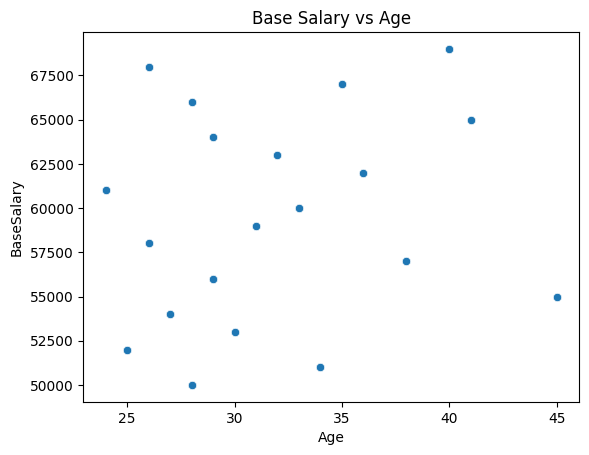

In [75]:
# @title Mối quan hệ giữa mức lương và tuổi
sns.scatterplot(data=df_salary, x="Age", y="BaseSalary")
plt.title("Base Salary vs Age")
plt.show()

In [77]:
# @title Mô hình dự báo Age và mức lương
#from sklearn.linear_model import LinearRegression

X = df_salary[["Age"]]  # biến độc lập
y = df_salary["BaseSalary"]  # biến phụ thuộc
model1 = LinearRegression()
model1.fit(X, y)

LinearRegression()

In [78]:
# @title Dự đoán và đánh giá mô hình
df_salary["PredictedSalary"] = model1.predict(X)

# So sánh thực tế và dự đoán
print(df_salary[["EmployeeID", "Age", "BaseSalary", "PredictedSalary"]])

# Đánh giá độ chính xác
#from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y, df_salary["PredictedSalary"])
r2 = r2_score(y, df_salary["PredictedSalary"])
print(f"MSE: {mse:.2f}")
print(f"R-squared: {r2:.2%}")

    EmployeeID  Age  BaseSalary  PredictedSalary
0         1001   28       50000     58804.126910
1         1002   34       51000     59888.604453
2         1003   25       52000     58261.888139
3         1004   30       53000     59165.619424
4         1005   27       54000     58623.380653
5         1006   45       55000     61876.813281
6         1007   29       56000     58984.873167
7         1008   38       57000     60611.589481
8         1009   26       58000     58442.634396
9         1010   31       59000     59346.365681
10        1011   33       60000     59707.858196
11        1012   24       61000     58081.141882
12        1013   36       62000     60250.096967
13        1014   32       63000     59527.111939
14        1015   29       64000     58984.873167
15        1016   41       65000     61153.828252
16        1017   28       66000     58804.126910
17        1018   35       67000     60069.350710
18        1019   26       68000     58442.634396
19        1020   40 

In [ ]:
# @title Nhận xét chỉ sổ MSE, R-squared có cải thiện so với mô hình trước nhưng vẫn yếu và chưa đủ để khẳng định mô hình hiệu quả. R-squared càng gần 1 càng tốt.